## Effect of batch size notebook

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [2]:
series = 8
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [3]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['1', '2', '4', '8', '16'],
    'data_type': 'text',
    'max_batch_size': ['1'],
    'max_batch_time': ['1'],
    'memory_request': ['60Gi'],
    'model_variants': [   'huggingface/distilbert-base-uncased-finetuned-mnli',
                          'huggingface/prunebert-base-uncased-6-finepruned-w-distil-mnli',
                          'distilbert-base-uncased-finetuned-sst-2-english'],
    'node_name': 'nlp-sent',
    'pipeline_name': '2-paper-audio-sent',
    'repetition': 3,
    'replicas': [1],
    'series': 8,
    'series_meta': 'checking effect of CPU allocation change,\\n cpu type: '
                   'Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'timeout': 120,
    'workload_config': {'load_duration': 60, 'loads_to_test': [1]},
    'workload_type': 'static'}


,model_variant,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,huggingface/distilbert-base-uncased-finetuned-...,1,6.815615,61.580121,2.279202
1,huggingface/distilbert-base-uncased-finetuned-...,1,3.322604,199.959934,1.786049
2,huggingface/distilbert-base-uncased-finetuned-...,1,3.220232,311.044529,1.782756
3,huggingface/distilbert-base-uncased-finetuned-...,2,4.154064,88.619099,2.024454
4,huggingface/distilbert-base-uncased-finetuned-...,2,3.778509,360.799879,1.909032
5,huggingface/distilbert-base-uncased-finetuned-...,2,3.729982,599.178862,1.944300
6,huggingface/distilbert-base-uncased-finetuned-...,4,0.800760,35.085850,0.296125
7,huggingface/distilbert-base-uncased-finetuned-...,4,0.721817,149.033790,0.208554
8,huggingface/distilbert-base-uncased-finetuned-...,4,0.575069,251.106110,0.179823
9,huggingface/distilbert-base-uncased-finetuned-...,8,0.241833,27.910951,0.052080


Text(0, 0.5, 'Latency (seconds)')

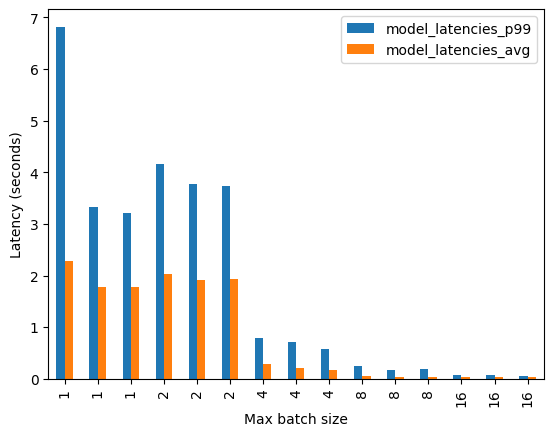

In [4]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'huggingface/distilbert-base-uncased-finetuned-mnli']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,huggingface/prunebert-base-uncased-6-fineprune...,1,11.859278,139.494699,4.646840
1,huggingface/prunebert-base-uncased-6-fineprune...,1,10.157596,424.500276,4.650790
2,huggingface/prunebert-base-uncased-6-fineprune...,1,7.804406,684.627548,4.205673
3,huggingface/prunebert-base-uncased-6-fineprune...,2,8.402433,192.131786,4.020489
4,huggingface/prunebert-base-uncased-6-fineprune...,2,7.424696,678.363673,3.982727
5,huggingface/prunebert-base-uncased-6-fineprune...,2,6.502784,1173.878963,3.741608
6,huggingface/prunebert-base-uncased-6-fineprune...,4,2.241069,61.240735,0.751214
7,huggingface/prunebert-base-uncased-6-fineprune...,4,1.068989,254.827774,0.515497
8,huggingface/prunebert-base-uncased-6-fineprune...,4,1.140078,421.285789,0.545067
9,huggingface/prunebert-base-uncased-6-fineprune...,8,0.854630,46.755468,0.181100


Text(0, 0.5, 'Latency (seconds)')

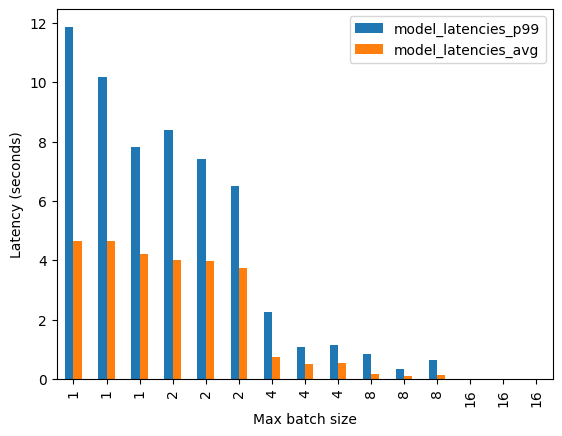

In [6]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'huggingface/prunebert-base-uncased-6-finepruned-w-distil-mnli']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,distilbert-base-uncased-finetuned-sst-2-english,1,4.970950,52.099052,2.106375
1,distilbert-base-uncased-finetuned-sst-2-english,1,4.239948,179.295445,1.960505
2,distilbert-base-uncased-finetuned-sst-2-english,1,5.036362,308.278937,2.110237
3,distilbert-base-uncased-finetuned-sst-2-english,2,4.080679,84.518861,2.053835
4,distilbert-base-uncased-finetuned-sst-2-english,2,3.278872,354.747967,1.882427
5,distilbert-base-uncased-finetuned-sst-2-english,2,3.704889,576.465136,1.826608
6,distilbert-base-uncased-finetuned-sst-2-english,4,1.104372,34.359273,0.258359
7,distilbert-base-uncased-finetuned-sst-2-english,4,0.668546,146.331473,0.189621
8,distilbert-base-uncased-finetuned-sst-2-english,4,0.580109,244.820188,0.173237
9,distilbert-base-uncased-finetuned-sst-2-english,8,1.004000,29.904271,0.083806


Text(0, 0.5, 'Latency (seconds)')

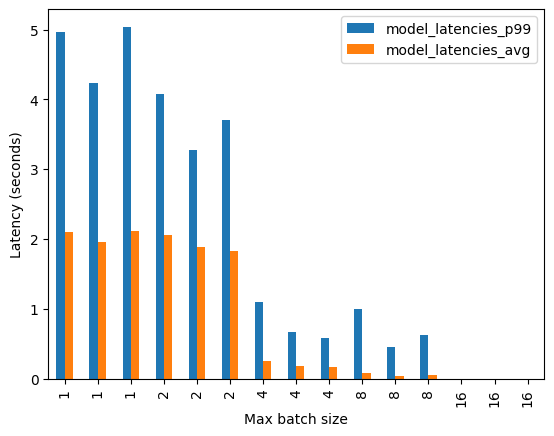

In [8]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'distilbert-base-uncased-finetuned-sst-2-english']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,16,40Gi,0.460552,538.296242,0.175557
1,yolov5n,16,40Gi,0.537392,1634.842875,0.194778
2,yolov5m,16,40Gi,0.432192,767.008656,0.318409
3,yolov5m,16,40Gi,0.414404,2075.306066,0.313605
4,yolov5x,16,40Gi,1.154209,1687.035852,0.941032
5,yolov5x,16,40Gi,1.146128,4614.602874,0.940430


Text(0, 0.5, 'Latency (seconds)')

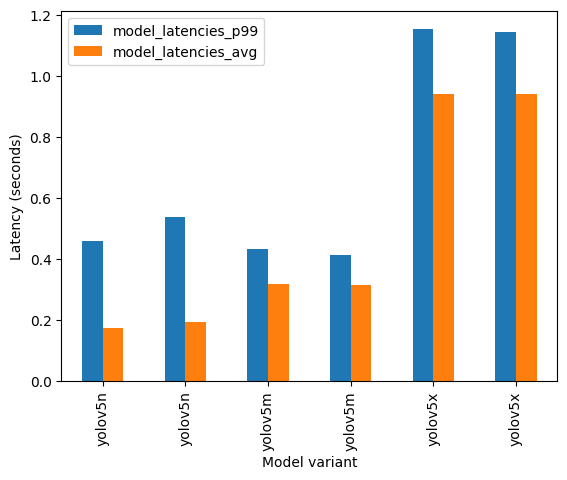

In [14]:
experiment_ids = key_config_df[
    key_config_df['max_batch_size'] == 2]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Model variant")
ax.set_ylabel("Latency (seconds)")